In [4]:
import os
import shutil#
os.chdir('/content')
if os.path.isdir('./hetvae'):
  shutil.rmtree('./hetvae/')
! git clone --branch errors https://github.com/mwl10/hetvae
os.chdir('/content/hetvae')
! pip install -r requirements.txt
os.chdir('/content/hetvae/src')
import numpy as np
import torch
import torch.optim as optim
import models
from argparse import Namespace
import torch.optim as optim
import utils
import my_utils
import pandas as pd
import importlib
import vae_models
importlib.reload(vae_models)
importlib.reload(models)
importlib.reload(utils)
importlib.reload(my_utils)
from glob import glob
import matplotlib.pyplot as plt
import sys
#del sys.modules['dataset']
from dataset import DataSet
%matplotlib inline

Cloning into 'hetvae'...
remote: Enumerating objects: 2229, done.
remote: Counting objects: 100% (369/369), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 2229 (delta 256), reused 281 (delta 189), pack-reused 1860
Receiving objects: 100% (2229/2229), 27.24 MiB | 10.09 MiB/s, done.
Resolving deltas: 100% (859/859), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

'''
Different ways of preprocessing DataSet object


    **************************************************
    prune_outliers()
    **************************************************
        parameters: std_threshold (default: 3)

        std_threshold sets how many stds from the mean y values we will remove outliers

        # alternatives to this? running average outlier pruning? 

    **************************************************
    resample_dataset()
    **************************************************

        desc: sampling from the errors and adding to the flux value to create more data variants
        
        parameters: num_samples (default: 1)

        num_samples sets how many sets of new samples we will make from the dataset

    **************************************************
    normalize()
    **************************************************

        parameters: normalize_y (default: individual)
                    normalize_x (default: none)

        normalize_y sets how we normalize the y values, & can be
            'all'         to normalize across the dataset 
            'individual'  to normalize per example

        normalize_x sets how we normalize x values (time) & can be
            '365'         to normalize by dividing by 365
            'all'         to normalize across the dataset
            'individual'  to normalize per example

    ->set_union_x() sets instance attribute (union_x) of the dataset object union_x for the network to use in calculating 'intensity' 
    ->zero_fill(), make_masks(), are formating that the network needs
    ->error_to_sample_weight() changes the errors column to sample weights which are used in the loss function 
            i.e. MSE = (y_pred - y)**2 * sample_weights 
    
'''

dims of /content/hetvae/data/EDELSON/NGC4593_W1.dat:	(150, 3)
dims of /content/hetvae/data/EDELSON/NGC4593_HX.dat:	(190, 3)
dims of /content/hetvae/data/EDELSON/NGC5548_W1.dat:	(260, 3)
dims of /content/hetvae/data/EDELSON/NGC5548_SX.dat:	(267, 3)
indexes of outliers to be pruned, if any: []
indexes of outliers to be pruned, if any: []
indexes of outliers to be pruned, if any: []
indexes of outliers to be pruned, if any: [ 87  96 102]
generating 9 new sample of each example in the dataset & appending them 
 old dataset length: 4
new dataset length: 40
created union_x attribute of length 861
zero fill all the examples up to the length of longest one given, dataset is also now a numpy array w shape: (40, 264, 3), instead of a list of numpy arrays
created subsampled_mask & recon_mask instance attributes
['/content/hetvae/data/EDELSON/NGC4593_W1.dat', '/content/hetvae/data/EDELSON/NGC4593_HX.dat', '/content/hetvae/data/EDELSON/NGC5548_W1.dat', '/content/hetvae/data/EDELSON/NGC5548_SX.dat']

/content/hetvae/src/dataset.py:206: RuntimeWarning: divide by zero encountered in true_divide
  


(861,)

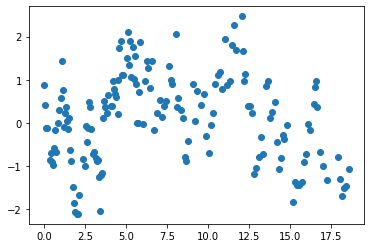

In [271]:
#--------------------------------------------------------------------------------------------------------
# PREPROCESSING, from Edelson data 
#--------------------------------------------------------------------------------------------------------
lc_files = glob('/content/hetvae/data/EDELSON/*')[:4]

# hypers: 
Edelson = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups() \
            .prune_outliers() \
            .resample_dataset(num_samples=9) \
            .normalize() \
            .reorder() \
            .set_union_x() \
            .zero_fill() \
            .error_to_sample_weight() \
            .make_masks(frac=0.33)

print(
    Edelson.files, '\n',
    Edelson.union_x.shape,
    Edelson.dataset.shape,
    Edelson.subsampled_mask.shape,
    Edelson.recon_mask.shape
  )

plt.scatter(Edelson.dataset[1,:-100,0], Edelson.dataset[1,:-100,1])
Edelson.union_x.shape

dims of /content/hetvae/data/CAT/MLS/MLS170107:110606+225434_20.85.dat:	(87, 3)
dims of /content/hetvae/data/CAT/MLS/MLS180611:145209+151338_21.35.dat:	(16, 3)
dims of /content/hetvae/data/CAT/MLS/MLS180607:095250+302251_20.96.dat:	(32, 3)
dims of /content/hetvae/data/CAT/MLS/MLS170405:122955+351423_19.95.dat:	(197, 3)
dims of /content/hetvae/data/CAT/MLS/MLS161107:013604+173405_19.88.dat:	(100, 3)
dims of /content/hetvae/data/CAT/MLS/MLS170222:114343+150109_19.78.dat:	(199, 3)
dims of /content/hetvae/data/CAT/MLS/MLS160707:231119+070347_20.71.dat:	(41, 3)
dims of /content/hetvae/data/CAT/MLS/MLS160604:124504+270109_20.51.dat:	(43, 3)
dims of /content/hetvae/data/CAT/MLS/MLS171013:025614+230758_20.38.dat:	(102, 3)
dims of /content/hetvae/data/CAT/MLS/MLS170330:103830+413348_20.39.dat:	(21, 3)
dims of /content/hetvae/data/CAT/MLS/MLS180703:150344+434640_20.88.dat:	(84, 3)
dims of /content/hetvae/data/CAT/MLS/MLS170927:010604+055734_19.61.dat:	(450, 3)
dims of /content/hetvae/data/CAT/ML

/content/hetvae/src/dataset.py:206: RuntimeWarning: divide by zero encountered in true_divide
  


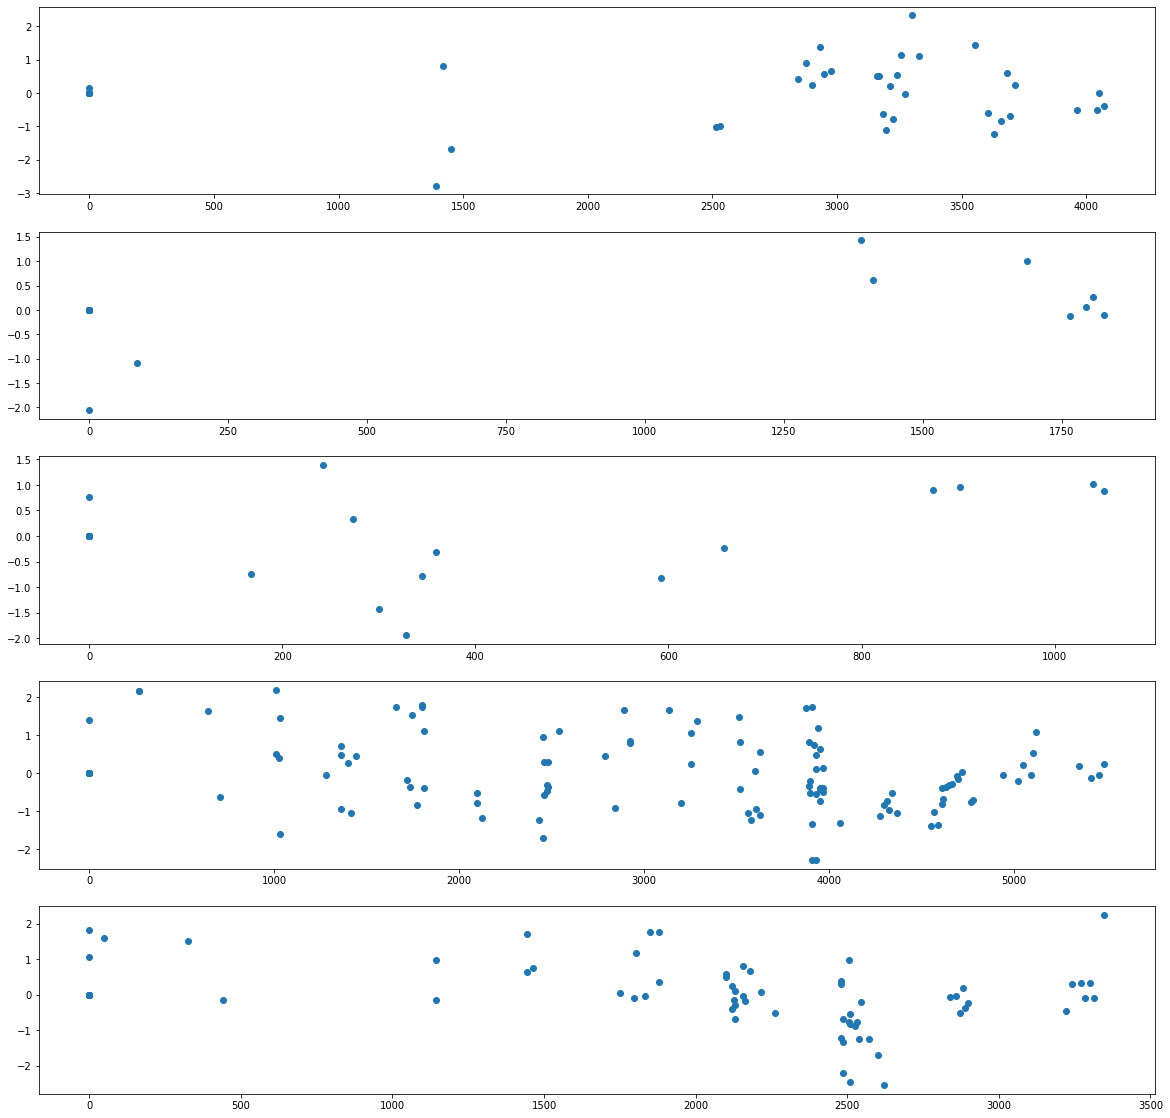

In [270]:
#--------------------------------------------------------------------------------------------------------
# PREPROCESSING, from Catalina data
#--------------------------------------------------------------------------------------------------------
lc_files = glob('/content/hetvae/data/CAT/*/*')[:50]

Catalina = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups() \
            .prune_outliers() \
            .resample_dataset(num_samples=1) \
            .normalize() \
            .reorder() \
            .set_union_x() \
            .zero_fill() \
            .error_to_sample_weight() \
            .make_masks(frac=0.5)

print(
    Catalina.files, '\n',
    Catalina.union_x.shape,
    Catalina.dataset.shape,
    Catalina.subsampled_mask.shape,
    Catalina.recon_mask.shape
  )
fig,ax = plt.subplots(5,1, figsize=(20,20))
for i in range(5):
    ax[i].scatter(Catalina.dataset[i,:-130,0], Catalina.dataset[i,:-130,1])

indexes of outliers to be pruned, if any: [600 601]
indexes of outliers to be pruned, if any: []
indexes of outliers to be pruned, if any: [418 583]
indexes of outliers to be pruned, if any: []
indexes of outliers to be pruned, if any: [ 98 205 260 261 554 555]
generating 5 new sample of each example in the dataset & appending them 
 old dataset length: 5
new dataset length: 30
created union_x attribute of length 2436
zero fill all the examples up to the length of longest one given, dataset is also now a numpy array w shape: (30, 619, 3), instead of a list of numpy arrays
created subsampled_mask & recon_mask instance attributes
(2436,) (30, 619, 3) (30, 619) (30, 619)


/content/hetvae/src/dataset.py:206: RuntimeWarning: divide by zero encountered in true_divide
  self.dataset[:,:,2] = 1. / self.dataset[:,:,2]


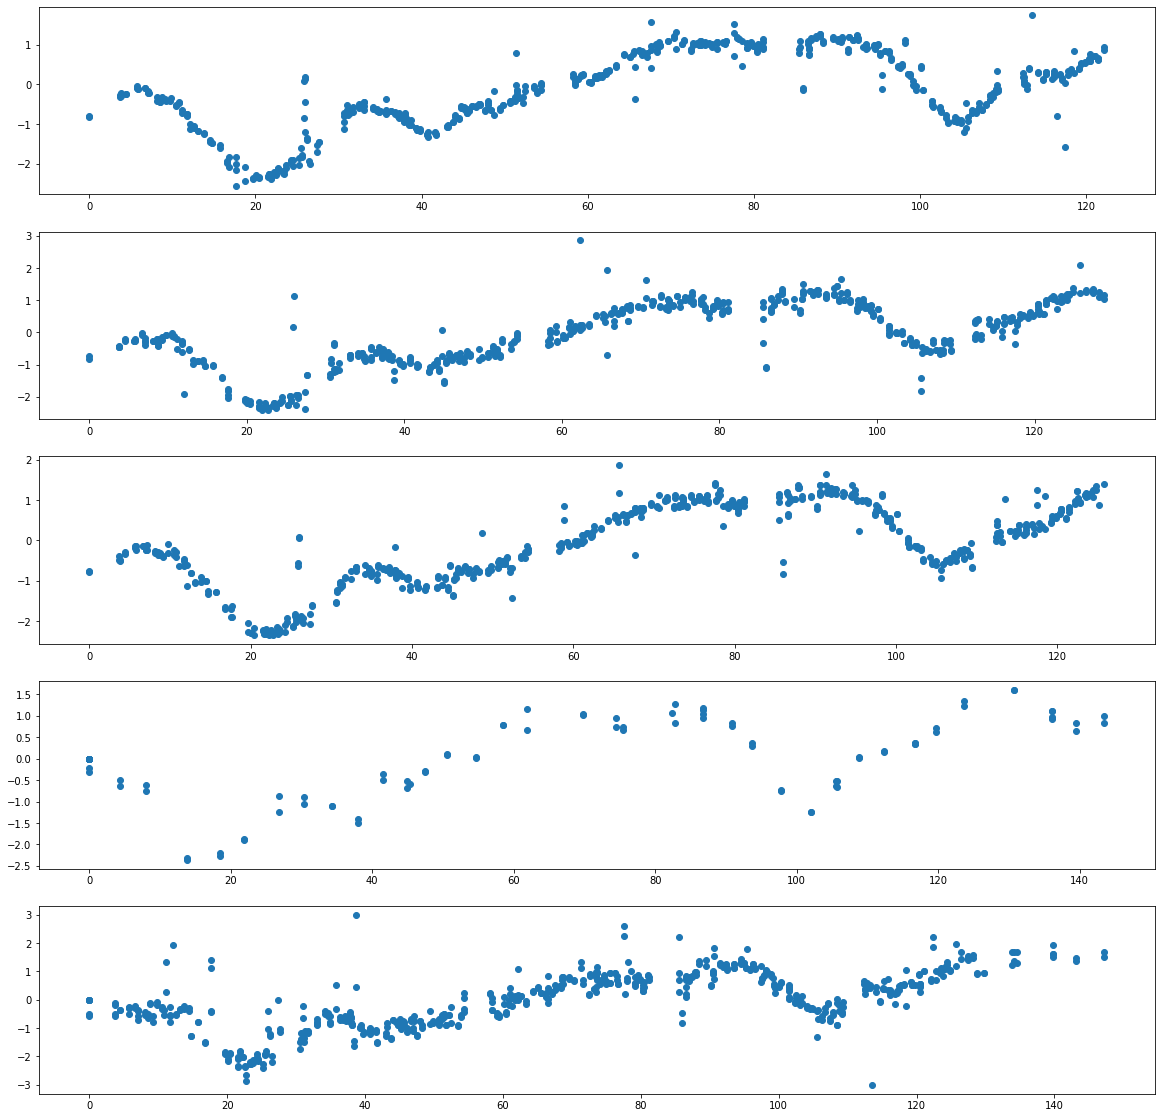

In [5]:
#------------------------------
# AGN Preprocessing, we have a DF w/ OBJECT , FILTER, MJD, FLUX, ERROR
#------------------------------

def get_AGN_data(file):
    agn_df = pd.read_csv(file)
    # handle formatting for new AGN
    lcs = []
    for lc_df in agn_df.groupby('Filter'):
        lc = lc_df[1][['MJD', 'Flux', 'Error']].to_numpy()
        lcs.append(lc)
    # lcs[0] = lcs[0][lcs[0][:,0].argsort()]
    # lcs[0] = np.concatenate((lcs[0][:10], lcs[0][410:]))
    
    # lcs = [lcs[0], lcs[0]]
    AGN_1H2106 = DataSet()
    AGN_1H2106.dataset = lcs # skip add files part

    AGN_1H2106 = AGN_1H2106.handle_dups() \
                          .prune_outliers(std_threshold=3) \
                          .resample_dataset(num_samples=5) \
                          .normalize(normalize_y='individual', normalize_x='') \
                          .reorder() \
                          .set_union_x() \
                          .zero_fill() \
                          .error_to_sample_weight() \
                          .make_masks(frac=0.5) \
                          .set_target_x(200)
    

    print(
        AGN_1H2106.union_x.shape,
        AGN_1H2106.dataset.shape,
        AGN_1H2106.subsampled_mask.shape,
        AGN_1H2106.recon_mask.shape
      )

    return AGN_1H2106


AGN_1H2106 = get_AGN_data('/content/hetvae/data/AGN_1H2106-099/1H2106-099_latest_lcs_pyroa.csv')


time = AGN_1H2106.dataset[:,:,0]

fig,ax = plt.subplots(5,1, figsize=(20,20))
for i in range(5):
    ax[i].scatter(AGN_1H2106.dataset[i,:-50,0], AGN_1H2106.dataset[i,:-50,1])

In [20]:
# num heads?
args = Namespace(batch_size=8, bound_variance=False, const_var=False,dropout=0.3, 
                 elbo_weight=1, embed_time=32, enc_num_heads=4, intensity=True, k_iwae=1, kl_annealing=False, 
                 kl_zero=False, latent_dim=64, lr=0.001, mixing='concat_and_mix', mse_weight=1., net='hetvae', 
                 niters=1000, norm=True, normalize_input='znorm', num_ref_points=64, rec_hidden=64, recon_loss=False, 
                 sample_tp=0.33, save=True, seed=0, shuffle=True, std=0.9, var_per_dim=False, width=64)



In [21]:
DIM = 1
# definitly want a decaying error rate...
#scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[], gamma=0.1)
seed = args.seed
torch.manual_seed(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [22]:
LightCurves = np.concatenate((AGN_1H2106.dataset, AGN_1H2106.subsampled_mask[:,:,np.newaxis], AGN_1H2106.recon_mask[:,:,np.newaxis]), axis=-1) # format the masks for the model 
#LightCurves = np.concatenate((Edelson.dataset, Edelson.subsampled_mask[:,:,np.newaxis], Edelson.recon_mask[:,:,np.newaxis]), axis=-1) # format the masks for the model 
#LightCurves = np.concatenate((Catalina.dataset, Catalina.subsampled_mask[:,:,np.newaxis], Catalina.recon_mask[:,:,np.newaxis]), axis=-1) # format the masks for the model 

print(LightCurves.shape)


(30, 619, 5)


In [23]:
training, valid = np.split(LightCurves, [int(np.floor(0.8*len(LightCurves)))])# shuffle?

train_loader = torch.utils.data.DataLoader(training, batch_size=args.batch_size)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=args.batch_size)
       

In [31]:
net = models.load_network(args, DIM, torch.Tensor(AGN_1H2106.union_x))
#net = models.load_network(args, DIM, torch.Tensor(Edelson.union_x))  
#net = models.load_network(args, DIM, torch.Tensor(Catalina.union_x)) 
params = list(net.parameters())
optimizer = optim.Adam(params, lr=0.002057519)

In [32]:
net.query

tensor([0.0000, 0.0159, 0.0317, 0.0476, 0.0635, 0.0794, 0.0952, 0.1111, 0.1270,
        0.1429, 0.1587, 0.1746, 0.1905, 0.2063, 0.2222, 0.2381, 0.2540, 0.2698,
        0.2857, 0.3016, 0.3175, 0.3333, 0.3492, 0.3651, 0.3810, 0.3968, 0.4127,
        0.4286, 0.4444, 0.4603, 0.4762, 0.4921, 0.5079, 0.5238, 0.5397, 0.5556,
        0.5714, 0.5873, 0.6032, 0.6190, 0.6349, 0.6508, 0.6667, 0.6825, 0.6984,
        0.7143, 0.7302, 0.7460, 0.7619, 0.7778, 0.7937, 0.8095, 0.8254, 0.8413,
        0.8571, 0.8730, 0.8889, 0.9048, 0.9206, 0.9365, 0.9524, 0.9683, 0.9841,
        1.0000])

In [33]:
def train(net, optimizer,epoch, train_loader, args, device="cuda"):
      
      train_loss = 0.
      train_n = 0.
      avg_loglik, avg_kl, mse, mae = 0., 0., 0., 0.
      for i, train_batch in enumerate(train_loader):
          batch_len = train_batch.shape[0] 
          #train_batch[:,:,2] = torch.ones((train_batch[:,:,3].shape))
          train_batch = train_batch.to(device)
          x = train_batch[:,:,0]
          y = train_batch[:,:,1:2]
          subsampled_mask = train_batch[:,:,3:4]
          recon_mask = train_batch[:,:,4:5]
          sample_weight = train_batch[:,:,2:3]
          # weights for loss in analogy to standard weighted least squares error 
  
          seqlen = train_batch.size(1) 
          # subsampled flux values and their corresponding masks....
          context_y = torch.cat((
              y * subsampled_mask, subsampled_mask
          ), -1) 
          recon_context_y = torch.cat((            # flux values with only recon_mask values showing
                  y * recon_mask, recon_mask
              ), -1) 
    # format: compute_unsupervised_loss(self, context_x, context_y, target_x, target_y, num_samples=1, beta=1):
          loss_info = net.compute_unsupervised_loss(
              x,
              context_y,  
              x,  # can pick the points we want to project to
              recon_context_y,
              num_samples=args.k_iwae, # 1? 
              beta=0.1,
              # optional, will be zero if not set
              sample_weight = 1.#sample_weight,

          )
          optimizer.zero_grad()
          loss_info.composite_loss.backward()
          optimizer.step()
          #scheduler.step()
          train_loss += loss_info.composite_loss.item() * batch_len
          avg_loglik += loss_info.loglik * batch_len
          avg_kl += loss_info.kl * batch_len
          mse += loss_info.mse * batch_len
          mae += loss_info.mae * batch_len
          train_n += batch_len
      
      
      if epoch % 100 == 0:
          print(
              'Iter: {}, train loss: {:.4f}, avg nll: {:.4f}, avg kl: {:.4f}, '
              'mse: {:.6f}, mae: {:.6f}'.format(
                  epoch,
                  train_loss / train_n,
                  -avg_loglik / train_n,
                  avg_kl / train_n,
                  mse / train_n,
                  mae / train_n
              )
          )


In [27]:
for g in optimizer.param_groups:
    print(g['lr'])
    g['lr'] = 0.00257519

0.002057519


In [34]:
for epoch in range(1, 501): #args.niters + 1):
    train(net, optimizer, epoch, train_loader, args)

Iter: 100, train loss: 0.3035, avg nll: 0.1693, avg kl: 0.0373, mse: 0.130420, mae: 0.237648
Iter: 200, train loss: 0.1924, avg nll: 0.0732, avg kl: 0.0204, mse: 0.117160, mae: 0.216438
Iter: 300, train loss: -0.0028, avg nll: -0.1158, avg kl: 0.0218, mse: 0.110836, mae: 0.206099
Iter: 400, train loss: -0.0033, avg nll: -0.1182, avg kl: 0.0223, mse: 0.112651, mae: 0.209815
Iter: 500, train loss: -0.1043, avg nll: -0.2132, avg kl: 0.0264, mse: 0.106314, mae: 0.198992


torch.Size([619, 1])
torch.Size([619, 1])
torch.Size([619, 1])
(50, 3, 619, 1) (50, 3, 619, 1)
pred_mean: (50, 3, 619, 1) pred_std: (50, 3, 619, 1)= targets: (3, 619, 1) masks: (3, 619, 1) tps: (3, 619) inputs: (3, 619, 1)
(3, 619, 1) (3, 619, 1) (3, 619, 1)
(1250, 3, 619, 1)
(200,) (200,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


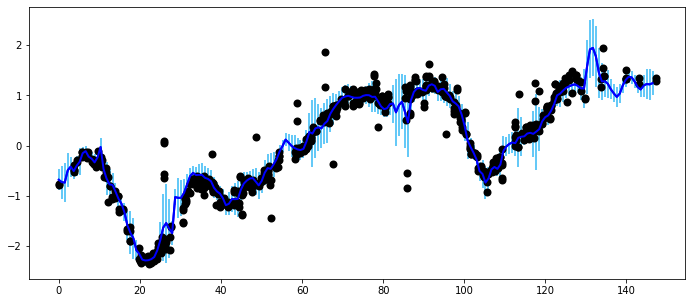

In [40]:
px, qz = viz_per_example(AGN_1H2106.dataset[2], AGN_1H2106.target_x[2], net, device=device, k_iwae=50)

In [1]:
px, qz = viz_per_example(AGN_1H2106.dataset[0], AGN_1H2106.target_x[0], net, device=device, k_iwae=50)
#px, qz = viz_per_example(AGN_1H2106.dataset[6], AGN_1H2106.dataset[6,:,0], net, device=device, k_iwae=50)

NameError: ignored

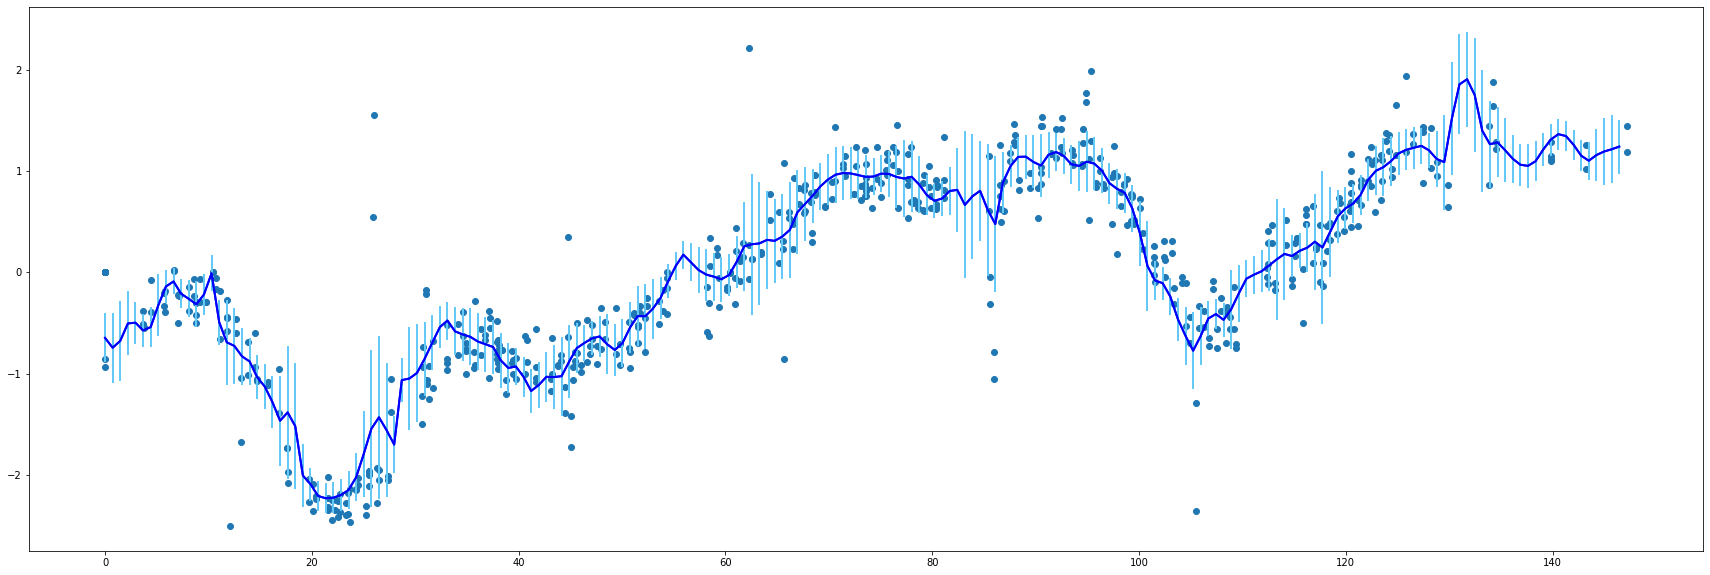

In [59]:
# visualisation for one light curve w/ increasing number of points
def viz_per_example(example, target_x, net, device="cuda", k_iwae=10, frac=0.5): 
    example = example[np.newaxis, :,:]
    target_x = target_x[np.newaxis, :, np.newaxis]
    np.random.seed(0)
    with torch.no_grad(): 
        if torch.is_tensor(example):
            example = example.cpu().numpy()
        # make new masks relative to fraction of points we got to predict w/ 
        smask, rmask = my_utils.make_masks(example, frac=frac)
        example = np.concatenate((example, smask[:,:,np.newaxis], rmask[:,:,np.newaxis], target_x), axis=-1) # format the masks 
        
        example = torch.tensor(example)
        example = example.to(device)
        
        subsampled_mask = example[:,:,3:4]
        context_y = torch.cat((example[:,:, 1:2] * subsampled_mask, subsampled_mask), -1)
        px, qz = net.get_reconstruction(example[:,:, 0], context_y, example[:,:,5], num_samples=k_iwae)

        qz_mean = (qz.mean.cpu().numpy())
        qz_std = (torch.exp(0.5 * qz.logvar).cpu().numpy())
        px_mean = px.mean.cpu().numpy()
        px_std = torch.exp(0.5 * px.logvar).cpu().numpy()
        example = example.cpu().numpy()

        px_mean = np.mean(px_mean, axis=0)[0,:200,0]
        px_std = np.mean(px_std, axis=0)[0,:200,0]
        target_x = target_x[0,:200,0]
        w=2.0
        plt.figure(figsize=(30, 10))
        #plt.fill_between(target_x, px_mean - 2*px_std, px_mean+2*px_std, color='gray')

        plt.plot(target_x, px_mean, c='b', lw=w, label='Reconstructions', zorder=20)
        plt.scatter(example[0,:,0], example[0,:,1])
        plt.errorbar(target_x, px_mean ,yerr=px_std,  ecolor='#65c9f7', c='b', lw=w, label='Reconstructions')

        plt.show()
        return px_mean, px_std, qz_mean, qz_std


px_mean, px_std, qz_mean, qz_std = viz_per_example(AGN_1H2106.dataset[6], AGN_1H2106.target_x[6], net, device=device, k_iwae=50)